<a href="https://colab.research.google.com/github/pranaaph/Data-Analysis/blob/main/NLP_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AUTHOR : PRANAAPH R**


The dataset has over ten thousand tweets about the early August 2015 GOP debate in Ohio. You are required to do some EDA and sentiment analysis.
1. Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc .
2.  Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Appropriate plots for all variables. Inferences on each plot.
3. Find the number of characters, words and sentences for the mentioned documents.
4. Remove the special characters, stopwords, perform tokenization & stemming.
5. Plot the word cloud.

### **Importing the Packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
from google.colab import drive

### **Importing the Dataset**

In [ ]:
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/'Python DataScience'
!ls

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Python DataScience
'Assignment_2 - Car_Dataset.ipynb'   hotel_bookings.csv		    NLP_Dataset.csv
'Car dataset.xlsx'		    'hotel_bookings raw data.csv'  'Text _Preprocesing.ipynb'
 EDA_Practice.ipynb		     NLP_Assignment_2.ipynb	    Untitled0.ipynb


In [ ]:
nlpData = pd.read_csv('NLP_Dataset.csv')
nlpDataCopy = nlpData.copy()

## **Exploratory Data Analysis**

### **Data Inspection**

**1.Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc .**

In [ ]:
nlpData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10669 entries, 0 to 10668
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   candidate             10669 non-null  object 
 1   sentiment             10669 non-null  object 
 2   sentiment_confidence  10669 non-null  float64
 3   subject_matter        10463 non-null  object 
 4   retweet_count         10669 non-null  int64  
 5   text                  10669 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 500.2+ KB


**Inference:**

    There are six variables in the given Dataset which has four object datatypes , one float and one int datatype.
    For each variable there are 10669 records are present.
    The variable 'subject_matter' has 206 null values.

---



In [ ]:
#Displaying the first 5 records
nlpData.head()

,candidate,sentiment,sentiment_confidence,subject_matter,retweet_count,text
0,Scott Walker,Positive,0.6333,None of the above,26,RT @ScottWalker: Didn't catch the full #GOPdeb...
1,No candidate mentioned,Positive,1.0000,None of the above,138,RT @RobGeorge: That Carly Fiorina is trending ...
2,Donald Trump,Positive,0.7045,None of the above,156,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...
3,Ted Cruz,Positive,0.6332,None of the above,228,"RT @GregAbbott_TX: @TedCruz: ""On my first day ..."
4,No candidate mentioned,Negative,0.6761,FOX News or Moderators,17,RT @warriorwoman91: I liked her and was happy ...


In [ ]:
#Statastics of the Dataset
nlpData.describe().T

,count,mean,std,min,25%,50%,75%,max
sentiment_confidence,10669.0,0.784311,0.212772,0.245,0.6574,0.6917,1.0,1.0
retweet_count,10669.0,48.384947,160.565744,0.000,0.0000,3.0000,59.0,4965.0


**Inference:**

**Sentiment_confidence:**

1.        The Mean value for the variables 'sentiment_confidence' is 0.78 which indicates high average confidence in setiment.
2.    The standard deviation is for the variable 'sentiment_confidence' is 0.21 which has less variablity around the mean.




**retweet_count:**


1.   
The Mean value for the variables 'retweet_count' is 48.38
2.   The standard deviation is for the variable 'retweet_count' is 160 which has wide variablity around the mean.




**2.Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Appropriate plots for all variables. Inferences on each plot.**

In [ ]:
#Shape of the Dataset
print ("Number of Records in the given dataset: " , nlpData.shape[0])
print ("Number of Variables in the given dataset: " , nlpData.shape[1])

Number of Records in the given dataset:  10669
Number of Variables in the given dataset:  6


In [ ]:
#Checking for null values
nlpDataCopy.isnull().sum()

candidate                 0
sentiment                 0
sentiment_confidence      0
subject_matter          206
retweet_count             0
text                      0
dtype: int64

In [ ]:
nlpData.dtypes

candidate                object
sentiment                object
sentiment_confidence    float64
subject_matter           object
retweet_count             int64
text                     object
dtype: object

In [ ]:
#Handling the Null values by filling the null values with mode of the variable
nlpData['subject_matter'].fillna(nlpData['subject_matter'].mode()[0], inplace = True)

In [ ]:
nlpData.isnull().sum()

candidate               0
sentiment               0
sentiment_confidence    0
subject_matter          0
retweet_count           0
text                    0
dtype: int64

In [ ]:
#Displaying the Categorical Variables
categoricalVariables = nlpData.select_dtypes(exclude=[np.number])
categoricalVariables.columns

Index(['candidate', 'sentiment', 'subject_matter', 'text'], dtype='object')

In [ ]:
#Displaying the Numerical Variables
numericalVariables = nlpData.select_dtypes(include=[np.number])
numericalVariables.columns

Index(['sentiment_confidence', 'retweet_count'], dtype='object')

In [ ]:
#Unique Values of the Variable 'Candidate'
nlpData['candidate'].unique()

array(['Scott Walker', 'No candidate mentioned', 'Donald Trump',
       'Ted Cruz', 'Ben Carson', 'Mike Huckabee', 'Chris Christie',
       'Marco Rubio', 'Jeb Bush', 'Rand Paul', 'John Kasich'],
      dtype=object)

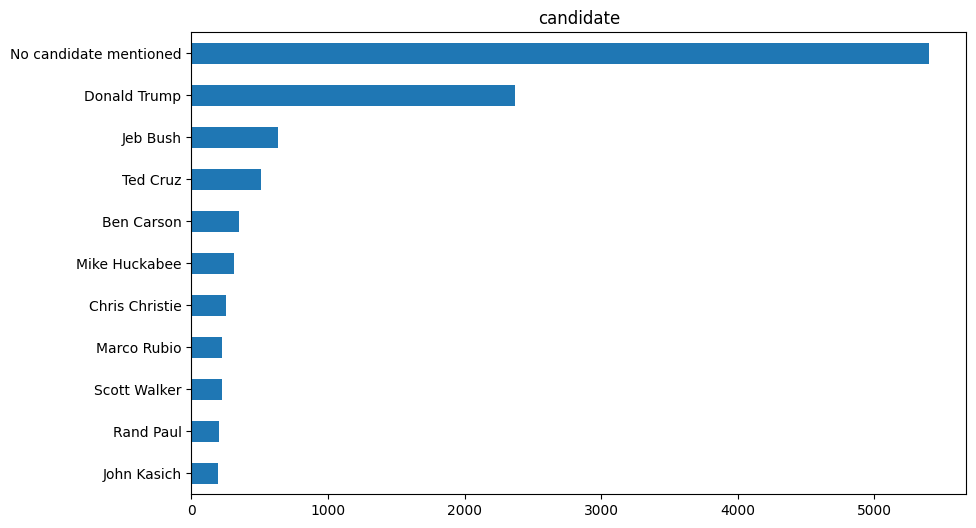

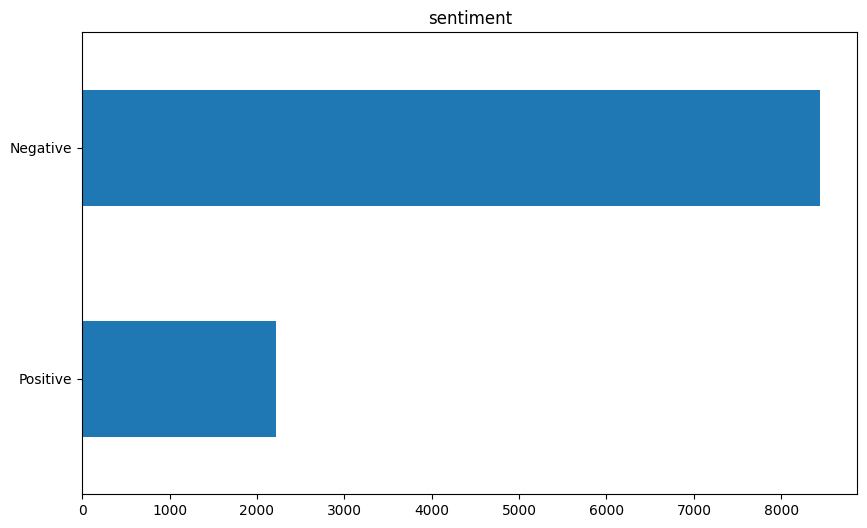

In [ ]:
# Univariate analysis for categorical variables
categoricalColumns = ['candidate', 'sentiment']

# Bar plots for categorical variables
for variable in categoricalColumns:
    plt.figure(figsize=(10, 6))
    nlpData[variable].value_counts().sort_values().plot(kind='barh')  #horizontal bar plot
    plt.title(variable)
    plt.show()

### **Inference:**

    1.Most of the Candidate names are unknown.
    2.Most of the sentiment feedbacks are negative

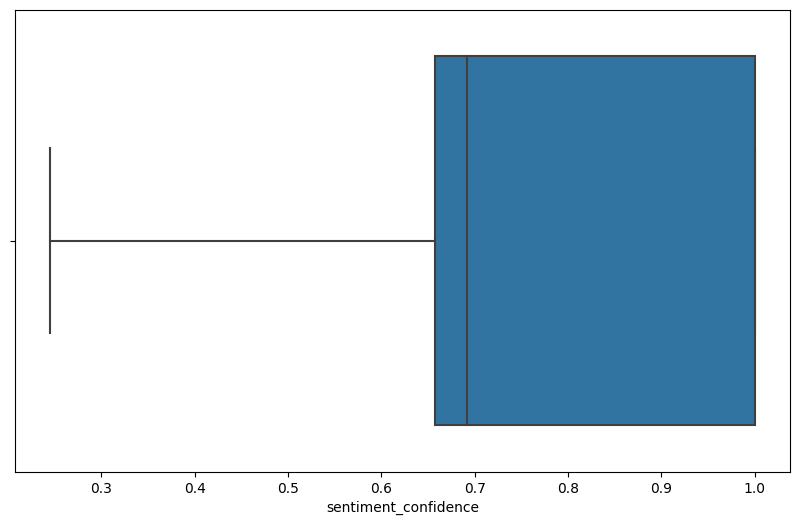

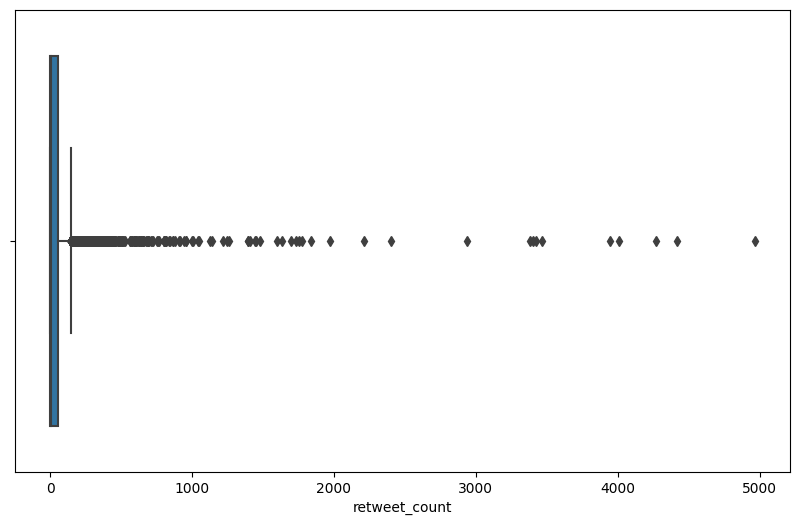

In [ ]:
# Univariate analysis for numerical columns
numericalVariables = ['sentiment_confidence', 'retweet_count']
for variable in numericalVariables:
  plt.figure(figsize=(10,6))
  sns.boxplot(nlpData , x = variable)
  plt.show()


**Inference:**

     There are no outliers in the variable 'sentiment_confidence'.
     The Outliers in the variable 'retweet_count' are present in the upper bound.

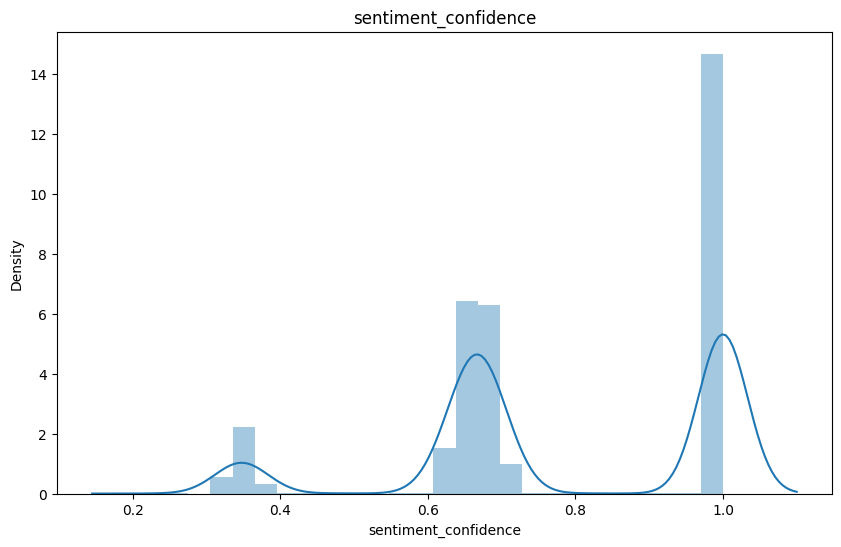

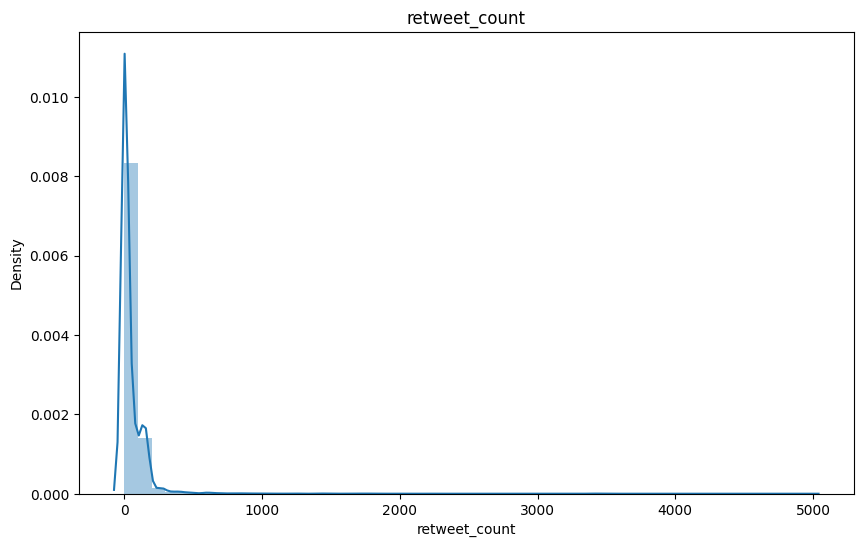

In [ ]:
#distribution
for variable in numericalVariables:
  plt.figure(figsize=(10,6))
  plt.title(variable)
  sns.distplot(nlpData[variable])
  plt.show()

**Inference:**
    
    The values of the variable 'retweet_count' has right skewed distribution

<ipython-input-20-265a617097cd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = nlpData.corr()


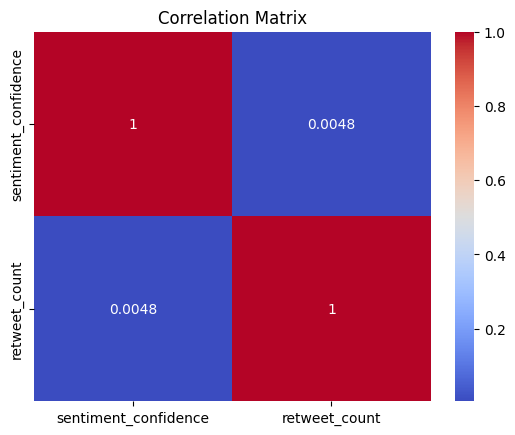

In [ ]:
# Visualize the correlation matrix
correlation = nlpData.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Inference :**

      There is no correlation between the variables('sentiment_confidence'
      and 'retweet_count') where the correlation co-efficient is 0.004
      which is nearly zero,which indicates there is no linear relationship.

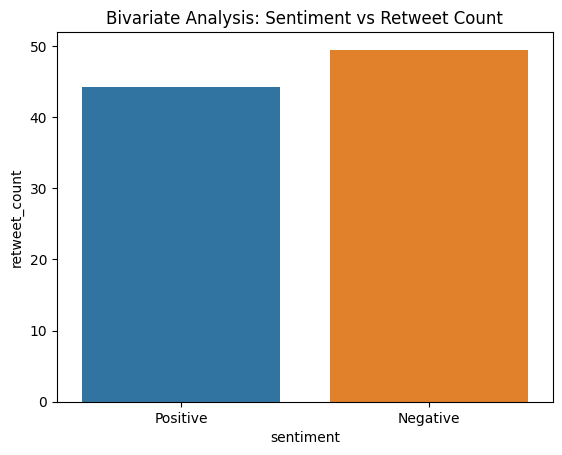

In [ ]:
sns.barplot(x = 'sentiment',y = 'retweet_count',data = nlpData , errorbar=None)
plt.title('Bivariate Analysis: Sentiment vs Retweet Count')
plt.show()

**Inference:**

  There are more retweets are done for negative sentiment.
      

**3.Find the number of characters, words and sentences for the mentioned documents.**

In [ ]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Tokenize and count for the 'text' column
nlpData['numOfCharacters'] = nlpData['text'].apply(lambda x: len(x))
nlpData['numOfWords'] = nlpData['text'].apply(lambda x: len(word_tokenize(x)))
nlpData['numOfSentences'] = nlpData['text'].apply(lambda x: len(sent_tokenize(x)))

# Total counts
totalCharacters = nlpData['numOfCharacters'].sum()
totalWords = nlpData['numOfWords'].sum()
totalSentences = nlpData['numOfSentences'].sum()

# Display total counts
print(f"\nTotal Characters: {totalCharacters}")
print(f"Total Words: {totalWords}")
print(f"Total Sentences: {totalSentences}")


Total Characters: 1242911
Total Words: 254173
Total Sentences: 21469


**4.Remove the special characters, stopwords, perform tokenization & stemming.**

In [ ]:
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
allStopwords = stopwords.words('english')
corpus=[]

for i in range(len(nlpData)):
  reviewText = re.sub('[^a-zA-Z]', ' ', nlpData['text'][i])
  reviewText = reviewText.split()
  reviewText = [ps.stem(word) for word in reviewText if not word in set(allStopwords)]
  reviewText = ' '.join(reviewText)
  corpus.append(reviewText)

nlpData['cleanedText'] = corpus


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nlpData['cleanedText'].head()

0    rt scottwalk didn catch full gopdeb last night...
1    rt robgeorg that carli fiorina trend hour her ...
2    rt danscavino gopdeb w realdonaldtrump deliv h...
3    rt gregabbott tx tedcruz on first day i rescin...
4    rt warriorwoman i like happi i heard go moder ...
Name: cleanedText, dtype: object

**5.Plot the word cloud.**

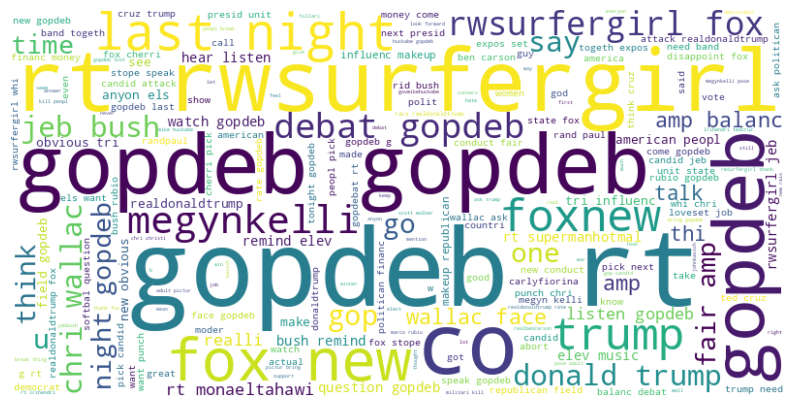

In [ ]:
from wordcloud import WordCloud

# 'cleanedText' variable in the dataframe 'nlpData'
textCorpus = ' '.join(nlpData['cleanedText'])

# word cloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(textCorpus)

# Plotting the WordCloud image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
